In [20]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
train = np.loadtxt('BovW/training_2b_32')
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')


In [21]:
mean = np.mean(train.T,axis=1)
centered = train - mean
cov = np.cov(centered.T)
eValues, eVectors = np.linalg.eig(cov)

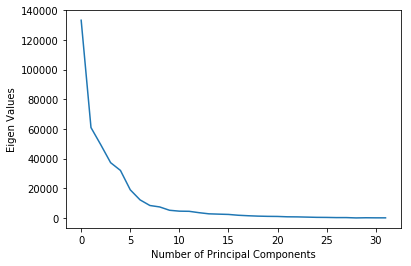

In [22]:
plt.xlabel('Number of Principal Components')
plt.ylabel('Eigen Values')
plt.plot(eValues)

In [4]:
combined = []
for i in range(len(eValues)):
    combined.append((eValues[i],eVectors[i]))
combined.sort(key = lambda x : x[0],reverse=True)

In [5]:
files = ["training_2b_32","test_2b_32","test_2b_32_c1","test_2b_32_c2","test_2b_32_c3","training_2b_c1_32","training_2b_c2_32","training_2b_c3_32"]

# Using 10 Features

In [64]:
number = 29
vectors = []
for i in range(number):
    vectors.append(combined[i][1])
#     print combined[i][1].shape
vectors = np.array(vectors)
for file in files:
    data = np.loadtxt("BovW/"+file)
    p = data.dot(vectors.T)
    np.savetxt("BovW/10/"+file, p)
# print vectors.shape

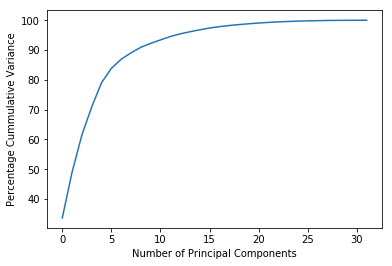

In [50]:
tot = sum(eValues)
var_exp = [(i / tot)*100 for i in sorted(eValues, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.xlabel('Number of Principal Components')
plt.ylabel('Percentage Cummulative Variance')
plt.plot(cum_var_exp)